## Primeiro teste de simulação de pulsares e outras categorias de estrelas.

Estou usando como fonte principal o artigo:"Pulsar Timing: monitorando pulsares com o
BINGO" escrito pelo excepcional (hoje mestre e doutorando) Victor Hugo Castro Queiroz
 sob orientação do prof. dr. Amílcar Queiroz.
(link: http://dspace.sti.ufcg.edu.br:8080/jspui/handle/riufcg/27156 )

O intuito desse projeto é o aprimoramento de tecnicas e ferramentas que eu utilizo no dia a dia
 em outro projeto só que dessa vez focada em uma ideia minha semfinalidade academica a priore.

### Geração de pulsares com parametros randomizados.

Esses parametros estão randomizados em valores realistas tirados de alguns bancos de dados porem os diferentes parametros sendo randomizados não possuem AINDA coerencia entre si.

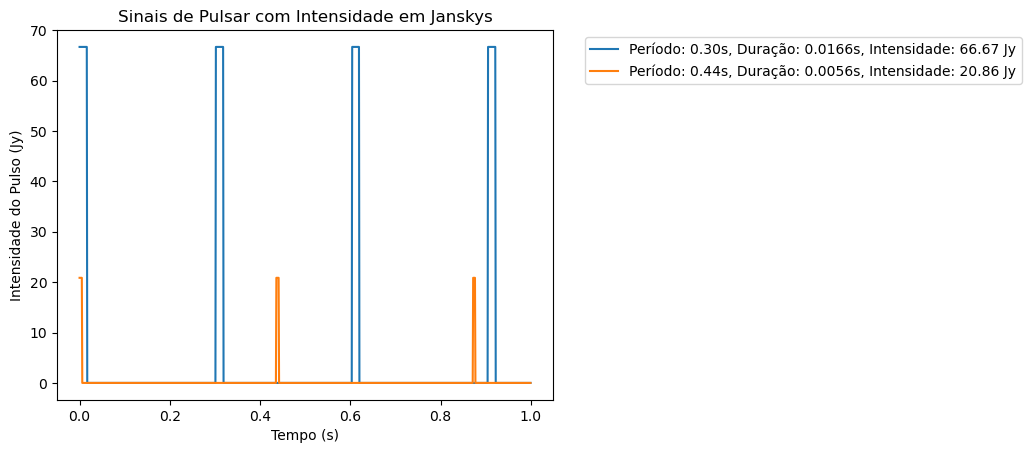

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def pulsar_signal_randomized(t, pulse_period, pulse_duration, pulse_intensity):
    signal = np.zeros_like(t)
    pulse_start = 0
    while pulse_start < t[-1]:
        pulse_end = pulse_start + pulse_duration
        indices = np.where((t >= pulse_start) & (t <= pulse_end))
        signal[indices] = pulse_intensity
        pulse_start += pulse_period
    return signal

def randomize_parameters():
    r_pulse_period = np.random.uniform(0.1, 0.5)  # Período do pulso entre 0.1 e 0.5 segundos
    r_pulse_duration = np.random.uniform(0.005, 0.02)  # Duração do pulso entre 0.005 e 0.02 segundos
    r_pulse_intensity = np.random.uniform(10, 100)  # Intensidade do pulso em Janskys
    return r_pulse_period, r_pulse_duration, r_pulse_intensity

# Parâmetros da simulação
sample_rate = 1000  # Taxa de amostragem (Hz)
total_time = 1  # Tempo total de simulação (s)
num_simulations = 2  # Número de simulações para randomizar os sinais

# Criar vetor de tempo
t = np.linspace(0, total_time, int(total_time * sample_rate), endpoint=False)

# Realizar múltiplas simulações com sinais de pulsar randomizados
for _ in range(num_simulations):
    r_pulse_period, r_pulse_duration, r_pulse_intensity = randomize_parameters()
    
    # Gerar sinal de pulsar com parâmetros randomizados
    r_pulsar = pulsar_signal_randomized(t, r_pulse_period, r_pulse_duration, r_pulse_intensity)

    # Plotar sinal de pulsar no domínio do tempo
    plt.plot(t, r_pulsar, label=f'Período: {r_pulse_period:.2f}s, Duração: {r_pulse_duration:.4f}s, Intensidade: {r_pulse_intensity:.2f} Jy')

plt.xlabel('Tempo (s)')
plt.ylabel('Intensidade do Pulso (Jy)')
plt.title('Sinais de Pulsar com Intensidade em Janskys')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Geração de pulsos NÂO randomizados mas com parametros fornecidos pelo usuario.

Essa versão gera um float na tela para inserir os parametros, as funções a seguir servem de teste para futuras aplicações.

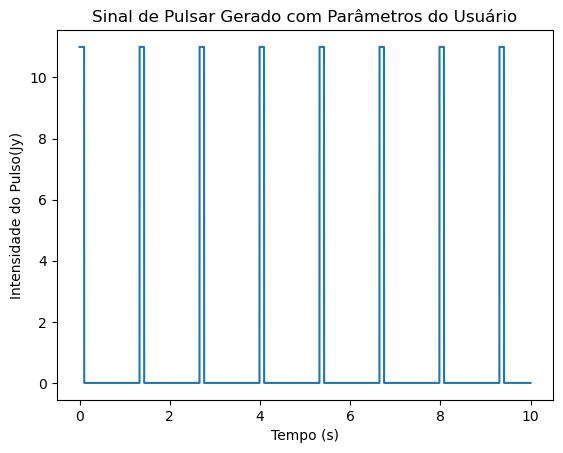

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sinal_pulsar(t, periodo_pulso, pulse_duration, pulse_intensity):
    signal = np.zeros_like(t)
    começo_pulso = 0
    while começo_pulso < t[-1]:
        pulse_end = começo_pulso + pulse_duration
        indices = np.where((t >= começo_pulso) & (t <= pulse_end))
        signal[indices] = pulse_intensity
        começo_pulso += periodo_pulso
    return signal

def generate_float_pulsar():
    # Obter parâmetros do usuário
    periodo_pulso = float(input("Informe o período do pulsar (segundos): "))
    pulse_duration = float(input("Informe a duração do pulso (segundos): "))
    pulse_intensity = float(input("Informe a intensidade do pulso: "))

    # Parâmetros da simulação
    sample_rate = 1000  # Taxa de amostragem (Hz)
    total_time = 10  # Tempo total de simulação (s)

    # Criar vetor de tempo
    t = np.linspace(0, total_time, int(total_time * sample_rate), endpoint=False)

    # Gerar sinal de pulsar com parâmetros fornecidos pelo usuário
    pulsar = sinal_pulsar(t, periodo_pulso, pulse_duration, pulse_intensity)

    # Plotar sinal de pulsar no domínio do tempo
    plt.plot(t, pulsar)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Intensidade do Pulso(Jy)')
    plt.title('Sinal de Pulsar Gerado com Parâmetros do Usuário')
    plt.show()

# Executar a função para gerar e plotar a pulsar
generate_float_pulsar()


#### Agora eu criei uma função onde você coloca os parametros direto na função para não depender de floats.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def sinal_pulsar(t, periodo_pulso, duracao_pulso, intensidade_media_pulso, fator_variacao_intensidade):
    sinal = np.zeros_like(t)
    inicio_pulso = 0
    while inicio_pulso < t[-1]:
        fim_pulso = inicio_pulso + duracao_pulso
        indices = np.where((t >= inicio_pulso) & (t <= fim_pulso))
        
        # Gerar uma intensidade aleatória para cada pulso
        intensidade_pulso = np.random.normal(intensidade_media_pulso, fator_variacao_intensidade)
        
        sinal[indices] = intensidade_pulso
        inicio_pulso += periodo_pulso
    return sinal

def gerar_pulsar(periodo_pulso, duracao_pulso, intensidade_media_pulso, fator_variacao_intensidade, tempo_total, taxa_amostragem=1000):
    # Criar vetor de tempo
    t = np.linspace(0, tempo_total, int(tempo_total * taxa_amostragem), endpoint=False)

    # Gerar sinal de pulsar com parâmetros fornecidos
    pulsar = sinal_pulsar(t, periodo_pulso, duracao_pulso, intensidade_media_pulso, fator_variacao_intensidade)

    # Plotar sinal de pulsar no domínio do tempo
    plt.plot(t, pulsar)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Intensidade do Pulso (Jy)')
    plt.title('Sinal de Pulsar Gerado com Variação na Intensidade')
    plt.show()

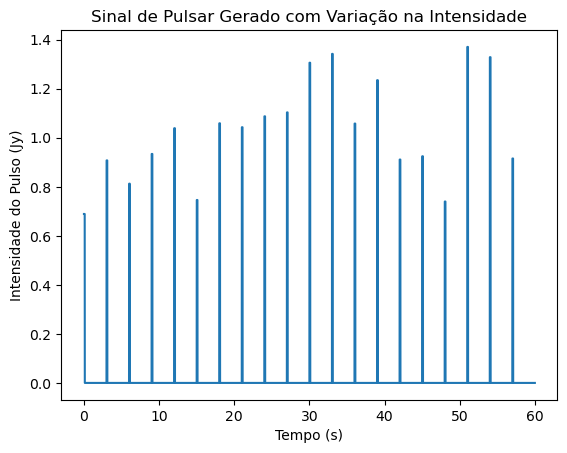

In [110]:
#ordem dos parametros: 1-periodo do pulso, 2-duração do pulso, 3-intensidade media do pulso, 4-fator de variação da intensidade, 5-duração da medida

gerar_pulsar(3.0, 0.1, 1.0, 0.2, 60)


## Segue a lista de graficos de algumas pulsares conhecidas.

#### PSR B1919+21 (primeiro pulsar descoberto, descoberto por S. J. Bell em 1967)

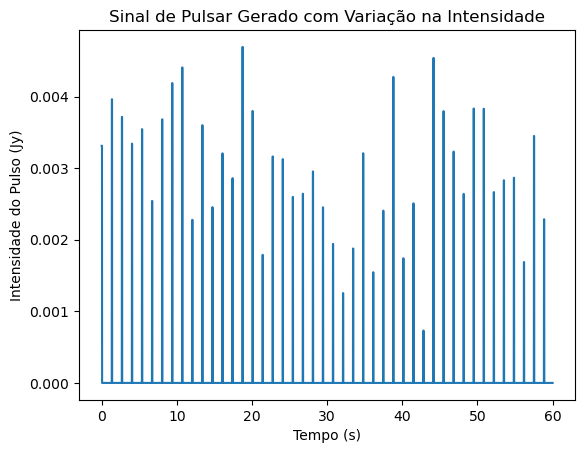

In [111]:
#ordem dos parametros: 1-periodo do pulso, 2-duração do pulso, 3-intensidade media do pulso, 4-fator de variação da intensidade, 5-duração da medida

gerar_pulsar(1.3373, 0.04, 0.003, 0.001, 60)

#### PSR A1234-5678:

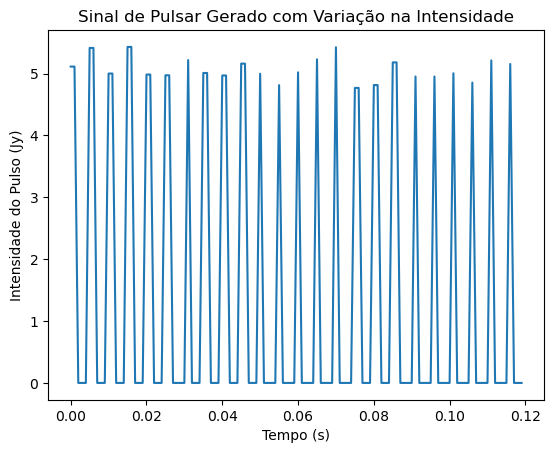

In [112]:
#ordem dos parametros: 1-periodo do pulso, 2-duração do pulso, 3-intensidade media do pulso, 4-fator de variação da intensidade, 5-duração da medida

gerar_pulsar(0.005, 0.001, 5, 0.2, 0.12)

#### PSR B9876-5432:

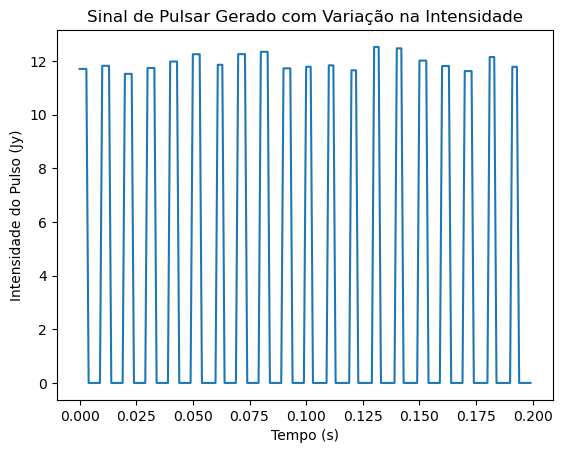

In [113]:
#ordem dos parametros: 1-periodo do pulso, 2-duração do pulso, 3-intensidade media do pulso, 4-fator de variação da intensidade, 5-duração da medida

gerar_pulsar(0.01, 0.003, 12, 0.25, 0.2)

#### PSR B1931+24:

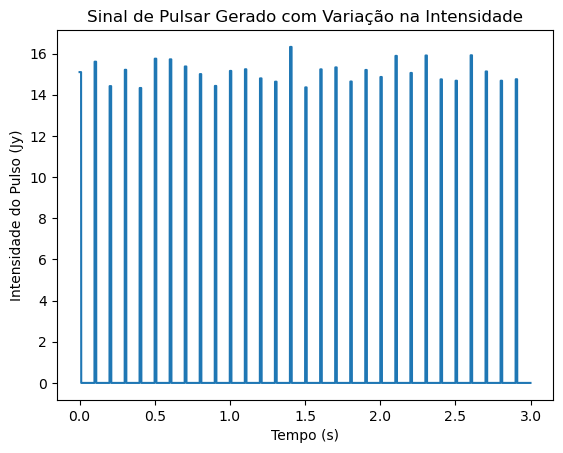

In [115]:
#ordem dos parametros: 1-periodo do pulso, 2-duração do pulso, 3-intensidade media do pulso, 4-fator de variação da intensidade, 5-duração da medida

gerar_pulsar(0.1, 0.01, 15, 0.5, 3)

### Agora simulando tambem uma RFI nos sinais de pulsar.

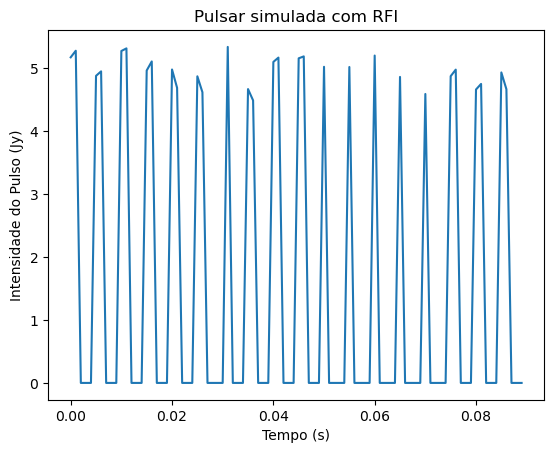

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sinal_pulsar(t, periodo_pulso, duracao_pulso, intensidade_media_pulso, fator_variacao_intensidade, desvio_padrao_ruido):
    sinal = np.zeros_like(t)
    inicio_pulso = 0
    while inicio_pulso < t[-1]:
        fim_pulso = inicio_pulso + duracao_pulso
        indices = np.where((t >= inicio_pulso) & (t <= fim_pulso))
        
        # Gerar uma intensidade aleatória para cada pulso
        intensidade_pulso = np.random.normal(intensidade_media_pulso, fator_variacao_intensidade)
        
        # Adicionar ruído gaussiano ao sinal de pulsar
        sinal[indices] = intensidade_pulso + desvio_padrao_ruido * np.random.normal(size=len(indices[0]))
        
        inicio_pulso += periodo_pulso
    return sinal

def gerar_pulsar_RFI(periodo_pulso, duracao_pulso, intensidade_media_pulso, fator_variacao_intensidade, desvio_padrao_ruido, tempo_total, taxa_amostragem=1000):
    # Criar vetor de tempo
    t = np.linspace(0, tempo_total, int(tempo_total * taxa_amostragem), endpoint=False)

    pulsar = sinal_pulsar(t, periodo_pulso, duracao_pulso, intensidade_media_pulso, fator_variacao_intensidade, desvio_padrao_ruido)

    # Plotar sinal de pulsar no domínio do tempo
    plt.plot(t, pulsar)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Intensidade do Pulso (Jy)')
    plt.title('Pulsar simulada com RFI')
    plt.show()

# Parâmetros


# Gerar pulsar com ruído e plotar
gerar_pulsar_RFI(0.005, 0.001, 5, 0.2, 0.12, 0.09)


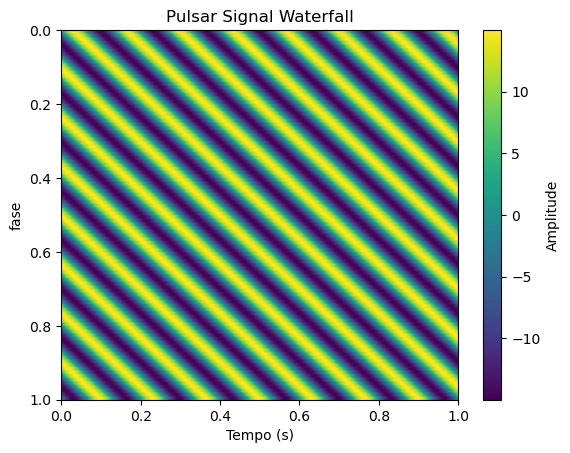

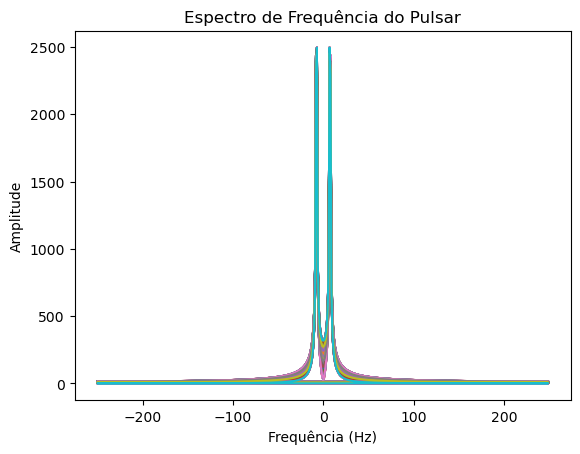

In [42]:
import numpy as np
import matplotlib.pyplot as plt

#array de tempo.
time = np.linspace(0, 1, 500)
# Definindo uma função simples de sinal de pulsar.
def pulsar_signal(time, period, amplitude, phase):
    return amplitude * np.sin(2 * np.pi * (time - phase) / period)

# Array de sinais de pulsar
signals = np.array([pulsar_signal(time, 0.1337, 15, phase) for phase in np.linspace(0, 1, 100)])

# Criando waterfall
plt.imshow(signals, aspect='auto', extent=[time.min(), time.max(), 1, 0])
plt.colorbar(label='Amplitude')
plt.xlabel('Tempo (s)')
plt.ylabel('fase')
plt.title('Pulsar Signal Waterfall')
plt.show()

# Calcular FFT
freq = np.fft.fftfreq(len(time), d=1/500)  # 500 é a taxa de amostragem.

# Calculando a Fast Fourier Transform e a magnitude para cada sinal e plotando o espectro de frequência
for signal in signals:
    pulsar_fft = np.fft.fft(signal)
    pulsar_fft_shifted = np.fft.fftshift(pulsar_fft)
    magnitude = np.abs(pulsar_fft)
    freq_shifted = np.fft.fftshift(freq)

    #plt.plot(freq_shifted, magnitude)
    plt.plot(freq, magnitude)

plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de Frequência do Pulsar')
plt.show()



